# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
clean_city_data_file = "output_data/cleancitydata.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = url + "&q=" + cities[0]
print(f"City = {cities[0]}")

# Get weather data
weather_response_json = requests.get(query_url).json()
weather_response_json

City = komsomolskiy


{'coord': {'lon': 71.72, 'lat': 40.43},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 78.8,
  'feels_like': 81.68,
  'temp_min': 78.8,
  'temp_max': 78.8,
  'pressure': 1013,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 2.24, 'deg': 0},
 'clouds': {'all': 40},
 'dt': 1595827709,
 'sys': {'type': 1,
  'id': 9014,
  'country': 'UZ',
  'sunrise': 1595808348,
  'sunset': 1595860392},
 'timezone': 18000,
 'id': 1513491,
 'name': 'Yangi Marg`ilon',
 'cod': 200}

In [5]:
# List for holding latitudes, temperature, humidity, cloudiness, wind speed
citys = []
countries = []
latitudes = []
longitudes = []
temps = []
humids = []
clouds = []
winds = []
city_ctr = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

for city in cities:
    city_ctr = city_ctr + 1
    query_url = url + "&q=" + city
    print(f"{city_ctr} {city}")
    # Get weather data
    weather_response_json = requests.get(query_url).json()
    try:
        citys.append(weather_response_json['name'])
        countries.append(weather_response_json['sys']['country'])
        latitudes.append(weather_response_json['coord']['lat'])
        longitudes.append(weather_response_json['coord']['lon'])
        temps.append(weather_response_json['main']['temp_max'])
        humids.append(weather_response_json['main']['humidity'])
        clouds.append(weather_response_json['clouds']['all'])
        winds.append(weather_response_json['wind']['speed'])
    except:
        pass

1 komsomolskiy
2 sao filipe
3 torbay
4 albany
5 nanjing
6 ushuaia
7 salta
8 rikitea
9 cape town
10 narsaq
11 severomuysk
12 illoqqortoormiut
13 mataura
14 inongo
15 belushya guba
16 makakilo city
17 kaeo
18 barrow
19 port alfred
20 hounde
21 punta arenas
22 kapaa
23 pleasant point
24 mattru
25 portland
26 butaritari
27 harper
28 raub
29 xianyang
30 najran
31 antalaha
32 mahebourg
33 toumodi
34 mar del plata
35 jaora
36 juifang
37 ojuelos de jalisco
38 amderma
39 kaitangata
40 bethel
41 ixtlahuacan del rio
42 okaihau
43 ribeira grande
44 hobart
45 cacahoatan
46 hithadhoo
47 hangal
48 gornopravdinsk
49 pisco
50 cabo san lucas
51 alice springs
52 nikolskoye
53 vaini
54 wladyslawowo
55 la rioja
56 sioux lookout
57 russell
58 byron bay
59 dikson
60 mayor pablo lagerenza
61 hilo
62 chateaudun
63 qaanaaq
64 pringsewu
65 rawson
66 puerto ayora
67 new norfolk
68 cherskiy
69 imeni babushkina
70 carbonia
71 atuona
72 vao
73 enumclaw
74 east london
75 charters towers
76 yellowknife
77 thompson
78 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "city": citys,
    "country": countries,    
    "latitude": latitudes,
    "longitude": longitudes,
    "temp": temps,
    "humid": humids,
    "cloud": clouds,
    "wind": winds
}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Yangi Marg`ilon,UZ,40.43,71.72,78.80,57,40,2.24
1,São Filipe,CV,14.90,-24.50,74.35,83,68,13.22
2,Torbay,CA,47.67,-52.73,55.99,100,90,17.22
3,Albany,US,42.60,-73.97,73.00,97,94,4.38
4,Nanjing,CN,32.06,118.78,77.00,100,90,4.47
...,...,...,...,...,...,...,...,...
550,Bintulu,MY,3.17,113.03,87.80,74,20,6.93
551,Esim,GH,4.87,-2.24,74.01,86,19,9.13
552,Syedove,UA,47.08,38.16,73.99,100,91,8.01
553,Doha,QA,25.29,51.53,102.20,37,41,6.93


In [7]:
weather_data_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_lessthan_100_df = weather_data_df[weather_data_df["humid"].astype(float) <= 100]
humidity_lessthan_100_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Yangi Marg`ilon,UZ,40.43,71.72,78.80,57,40,2.24
1,São Filipe,CV,14.90,-24.50,74.35,83,68,13.22
2,Torbay,CA,47.67,-52.73,55.99,100,90,17.22
3,Albany,US,42.60,-73.97,73.00,97,94,4.38
4,Nanjing,CN,32.06,118.78,77.00,100,90,4.47
...,...,...,...,...,...,...,...,...
550,Bintulu,MY,3.17,113.03,87.80,74,20,6.93
551,Esim,GH,4.87,-2.24,74.01,86,19,9.13
552,Syedove,UA,47.08,38.16,73.99,100,91,8.01
553,Doha,QA,25.29,51.53,102.20,37,41,6.93


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100_df = weather_data_df[weather_data_df["humid"].astype(float) > 100]
humidity_over_100_df.index.values

array([], dtype=int64)

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(humidity_over_100_df.index.values, inplace=False)
clean_city_data_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Yangi Marg`ilon,UZ,40.43,71.72,78.80,57,40,2.24
1,São Filipe,CV,14.90,-24.50,74.35,83,68,13.22
2,Torbay,CA,47.67,-52.73,55.99,100,90,17.22
3,Albany,US,42.60,-73.97,73.00,97,94,4.38
4,Nanjing,CN,32.06,118.78,77.00,100,90,4.47
...,...,...,...,...,...,...,...,...
550,Bintulu,MY,3.17,113.03,87.80,74,20,6.93
551,Esim,GH,4.87,-2.24,74.01,86,19,9.13
552,Syedove,UA,47.08,38.16,73.99,100,91,8.01
553,Doha,QA,25.29,51.53,102.20,37,41,6.93


In [11]:
# Extract relevant fields from the data frame
clean_city_data = clean_city_data_df[["city","country","latitude","longitude","temp","humid","cloud","wind"]]

# Export the City_Data into a csv
clean_city_data.to_csv(clean_city_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
# compute for the current date in mm/dd/yy format
from datetime import date

today = date.today()

mmddyy_format = today.strftime("%m/%d/%y")
print("mmddyy_format =", mmddyy_format)

mmddyy_format = 07/27/20


In [13]:
clean_city_data_df.head()

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Yangi Marg`ilon,UZ,40.43,71.72,78.80,57,40,2.24
1,São Filipe,CV,14.90,-24.50,74.35,83,68,13.22
2,Torbay,CA,47.67,-52.73,55.99,100,90,17.22
3,Albany,US,42.60,-73.97,73.00,97,94,4.38
4,Nanjing,CN,32.06,118.78,77.00,100,90,4.47


In [14]:
clean_latitudes = clean_city_data_df["latitude"]
clean_temps = clean_city_data_df["temp"]
clean_humids = clean_city_data_df["humid"]
clean_clouds = clean_city_data_df["cloud"]
clean_winds = clean_city_data_df["wind"]

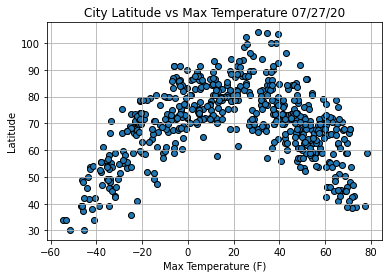

In [15]:
plt.scatter(clean_latitudes, clean_temps, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature {mmddyy_format}")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

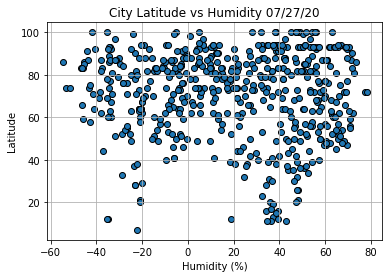

In [16]:
plt.scatter(clean_latitudes, clean_humids, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Humidity {mmddyy_format}")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

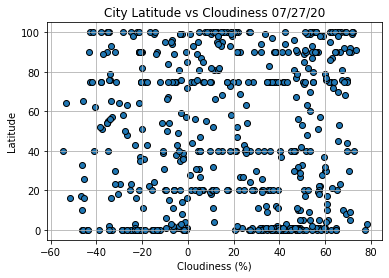

In [17]:
plt.scatter(clean_latitudes, clean_clouds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness {mmddyy_format}")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

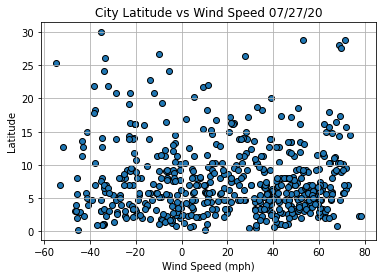

In [18]:
plt.scatter(clean_latitudes, clean_winds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed {mmddyy_format}")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

In [20]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) >= 0]
south_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

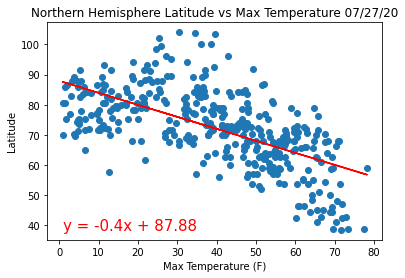

In [21]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Max Temperature {mmddyy_format}")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

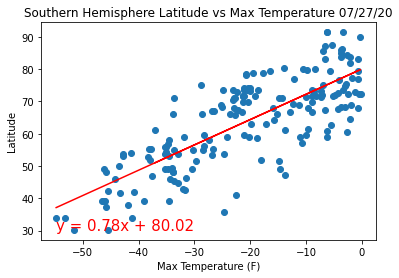

In [22]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Max Temperature {mmddyy_format}")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

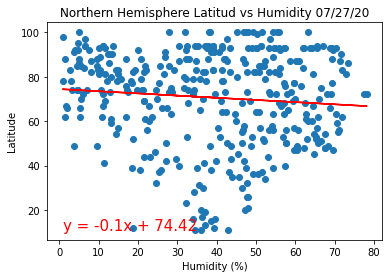

In [23]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitud vs Humidity {mmddyy_format}")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

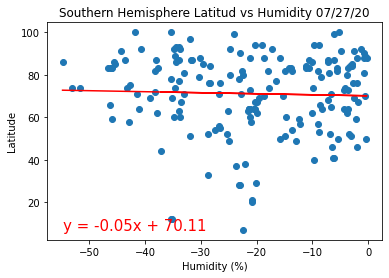

In [24]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitud vs Humidity {mmddyy_format}")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

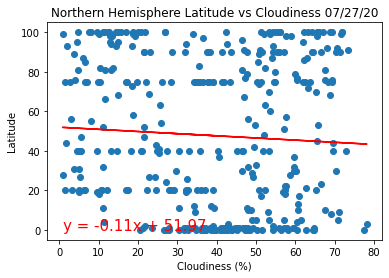

In [25]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Cloudiness {mmddyy_format}")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

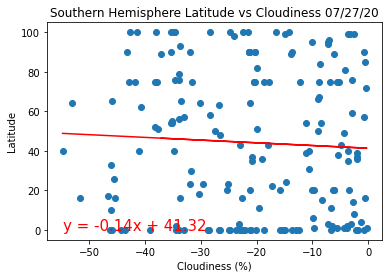

In [26]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Cloudiness {mmddyy_format}")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

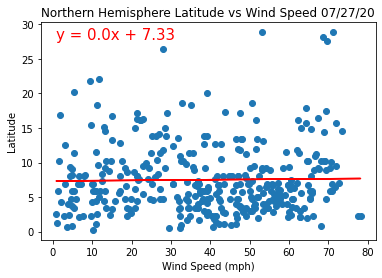

In [27]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Wind Speed {mmddyy_format}")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

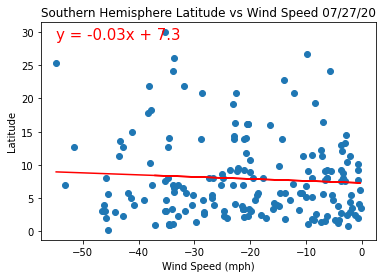

In [28]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Wind Speed {mmddyy_format}")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()